# Cost Benefit Analysis

__Table of Contents:__
- [Loading of related data](#Load-related-data)
- [Spray characteristics](#Spray-characteristics)
- [Effectiveness of spray on number of mosquitos](#Effectiveness-of-spray-on-number-of-mosquitos)
- [Benefits](#Benefits)
- [Costs](#Costs)
- [WHEN SHOULD WE SPRAY](#WHEN-SHOULD-WE-SPRAY)
- [WHERE SHOULD WE SPRAY](#WHERE-SHOULD-WE-SPRAY)
- [Projected cases of West Nile Virus](#Projected-cases-of-West-Nile-Virus)
- [Further work](#Further-work)
- [Conclusion](#Conclusion)


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import get_cmap
from sklearn.neighbors import KernelDensity

%matplotlib inline

## Load related data

In [22]:
spray = pd.read_csv('../data/spray_cleaned.csv', index_col='Unnamed: 0').reset_index()
merged = pd.read_csv('../data/merged.csv')

In [23]:
spray.head()

,index,Date,Latitude,Longitude,Year,Month,Day,Week
0,95,2011-07-09,41.981433,-87.787777,2011,7,9,27
1,96,2011-07-09,41.980998,-87.787778,2011,7,9,27
2,97,2011-07-09,41.980560,-87.787762,2011,7,9,27
3,98,2011-07-09,41.980198,-87.787758,2011,7,9,27
4,99,2011-07-09,41.979752,-87.787765,2011,7,9,27


In [27]:
spray_agg = spray.groupby('Date').count()['Latitude'].to_frame()

In [28]:
spray_agg.columns = ['spray_locations']
spray_agg.sort_index()

,spray_locations
Date,
2011-07-09,1573
2013-05-09,924
2013-07-17,2197
2013-07-25,1607
2013-08-08,1195
2013-08-15,2809
2013-08-22,1587
2013-08-29,2302


In [29]:
spray_agg.index

Index(['2011-07-09', '2013-05-09', '2013-07-17', '2013-07-25', '2013-08-08',
       '2013-08-15', '2013-08-22', '2013-08-29'],
      dtype='object', name='Date')

## Spray characteristics

__Spray type__

Zenivex™ has been used effectively to control disease-carrying __adult__ mosquitoes and is non-persistent, decomposing rapidly in the environment.

__Spray Contractor__: Vector Disease Control 

__Spray application__

- In hotspots where the West Nile Virus is more serious/prevalent
- 1.5 fluid ounces per acre
- Apply to wind speeds >= 1mph <= 10 mph
- Use a vehicle-mounted cold aerosol ULV sprayer to apply the product

## Effectiveness of spray on number of mosquitos

In [37]:
from math import radians, cos, sin, asin, sqrt, atan2

#calc of distance using harvine's formula
def calc_dist_chk(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    #formula calc distance between two points 
    #haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    #distance in km
    distance = R * c

    return round(distance, 4)

In [31]:
df_after_spray_final = pd.DataFrame(columns=['last_spray_date', 'spray_lat', 'spray_lng', 'tr_date', 'tr_lat', 'tr_lng' , 'num_mosquitos'])


In [38]:
for i in range(spray.shape[0]): #loop thru spray date
        spray_date = spray.loc[i, 'Date']
        spray_lat = spray.loc[i, 'Latitude']
        spray_lon = spray.loc[i, 'Longitude']
        
        tr_coincide = merged[(merged['Test Date'] > spray_date)].reset_index()
        for j in range(tr_coincide.shape[0]): #loop thru train 
            tr_date = tr_coincide.loc[j, 'Test Date']
            tr_lat = tr_coincide.loc[j, 'Latitude']
            tr_lon = tr_coincide.loc[j, 'Longitude']
            num_mosquito = tr_coincide.loc[j, 'NumMosquitos']
            if calc_dist_chk(tr_lat, tr_lon, spray_lat, spray_lon) < 0.2:
                print('Spray near traps')
                df_after_spray_final = df_after_spray_final.append({'last_spray_date': spray_date,
                                      'spray_lat': spray_lat,
                                      'spray_lng': spray_lon,
                                      'tr_date':  tr_date,
                                      'tr_lat': tr_lat,
                                      'tr_lng': tr_lon,
                                        'num_mosquitos': num_mosquito}, ignore_index=True)

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near traps
Spray near tra

In [40]:
merged[(merged['Test Date']>='2013-01-01') & (merged['WnvPresent'] == 1)]

,Test Date,Species,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,...,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,Days between Spray and Test,Has been Sprayed,Hour,Minute,Second,Daylight Hours
8490,2013-06-28,CULEX PIPIENS/RESTUANS,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9,38,1,2,...,0,0,0,0,-34.0,0,15.0,12.0,0.0,15.0
8691,2013-07-12,CULEX PIPIENS/RESTUANS,T159,"8900 S CARPENTER ST, Chicago, IL",41.732984,-87.649642,8,27,1,2,...,0,0,0,0,-20.0,0,15.0,1.0,0.0,15.0
8715,2013-07-12,CULEX RESTUANS,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,36,1,2,...,1,0,0,0,NaN,0,15.0,1.0,0.0,15.0
8721,2013-07-12,CULEX PIPIENS/RESTUANS,T008,"7000 N MOSELL AVE, Chicago, IL",42.008314,-87.777921,9,33,1,1,...,0,0,0,0,NaN,0,15.0,1.0,0.0,15.0
8722,2013-07-12,CULEX RESTUANS,T008,"7000 N MOSELL AVE, Chicago, IL",42.008314,-87.777921,9,45,1,1,...,1,0,0,0,NaN,0,15.0,1.0,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10388,2013-09-19,CULEX PIPIENS/RESTUANS,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,27,1,1,...,0,0,0,0,NaN,0,12.0,19.0,0.0,12.0
10439,2013-09-26,CULEX PIPIENS,T003,"4600 N MILWAUKEE AVE, Chicago, IL",41.964242,-87.757639,8,3,1,1,...,0,0,0,0,NaN,0,11.0,59.0,0.0,12.0
10462,2013-09-26,CULEX PIPIENS/RESTUANS,T155,"6300 W 64TH ST, Chicago, IL",41.776156,-87.778927,9,4,1,2,...,0,0,0,0,NaN,0,11.0,59.0,0.0,12.0
10484,2013-09-26,CULEX PIPIENS/RESTUANS,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,39,1,1,...,0,0,0,0,NaN,0,11.0,59.0,0.0,12.0


In [41]:
#only want those observations which are after spray date
df_after_spray_final = df_after_spray_final[(df_after_spray_final['tr_date'] > df_after_spray_final['last_spray_date'])]

In [42]:
df_after_spray_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3848 entries, 0 to 3847
Data columns (total 7 columns):
last_spray_date    3848 non-null object
spray_lat          3848 non-null float64
spray_lng          3848 non-null float64
tr_date            3848 non-null object
tr_lat             3848 non-null float64
tr_lng             3848 non-null float64
num_mosquitos      3848 non-null object
dtypes: float64(4), object(3)
memory usage: 240.5+ KB


In [52]:
df_after_spray_final.tr_date = pd.to_datetime(df_after_spray_final.tr_date)

In [53]:
num_mos_nearby = df_after_spray_final.groupby('tr_date')['num_mosquitos'].sum().to_frame()

In [54]:
num_mos_nearby

,num_mosquitos
tr_date,
2011-07-11,504
2011-07-15,1024
2011-07-25,2160
2011-07-29,752
2011-08-05,960
2011-08-12,56
2011-08-26,40
2011-09-01,128
2011-09-12,80


In [56]:
spray_agg.index

Index(['2011-07-09', '2013-05-09', '2013-07-17', '2013-07-25', '2013-08-08',
       '2013-08-15', '2013-08-22', '2013-08-29'],
      dtype='object', name='Date')

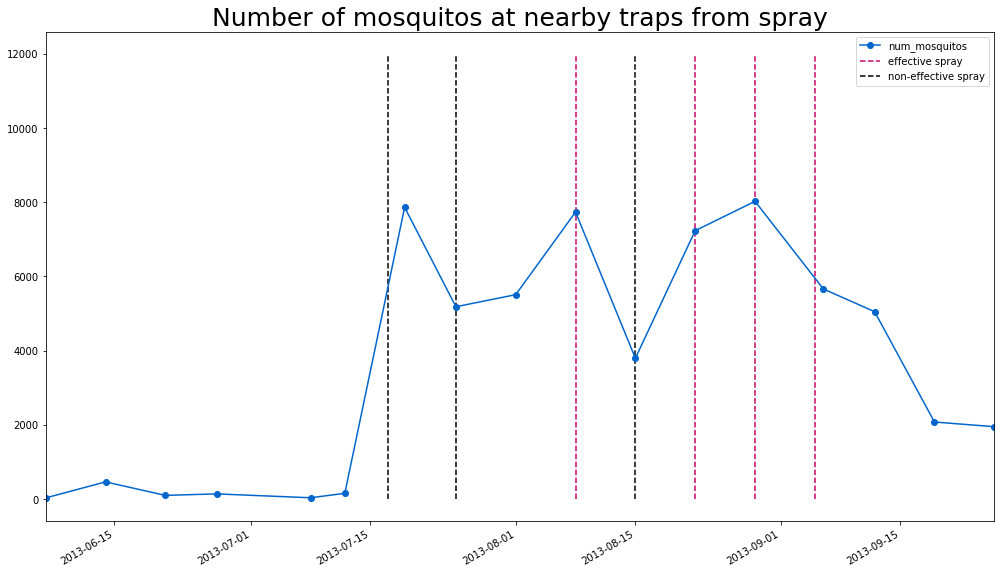

In [59]:
num_mos_nearby['2013'].plot(figsize=(17,10), marker='o', color='#0066cc');
plt.vlines(['2013-08-08','2013-08-22', '2013-08-29', '2013-09-05'], ymin=0, ymax=12000, linestyles='dashed', color='#cc0066', label='effective spray');
plt.vlines(['2013-07-17', '2013-07-25', '2013-08-15'], ymin=0, ymax=12000, linestyles='dashed', label='non-effective spray');
plt.title("Number of mosquitos at nearby traps from spray", size=25);
plt.xlabel("")
plt.grid(b=False)
plt.legend();

This plot shows if spraying helps to decrease the total number of mosquitos. Four sprays, for example in July 17 and end July of 2013 does not result in the decrease of mosquitos while the other 4 sprays actually do have an effect in the decrease of the mosquito population. 

We can thus conclude that it still helps to decrease the mosquito popluation. 

## Benefits

- Lowers the number of mosquitos which are carriers of not only West Nile virus but also other vector bourne diseases such as Zika 
- Lower the high costs of possible medical and hospitalisation fees
- Reduce costs of the state to handle such outbreaks and emergencies

## Costs

We know what the benefits are and obviously lowering the occurence of virus will be beneficial for the population of Chicago. 
Now let's look at how cost effective it is spraying really is. 

Yearly estimated costs can be segregated into two categories:
- Medical fees 
- Vector control measures - Spraying insecticide

__Incorporating the cost of inaccuracy__ 

Since this is a classification problem, we would ideally want to work towards minimizing the number of false positive and false negative classifications. Especially when such misclassification would result in an increased probability of epidemic or unnecessarily spending money on spraying locations where there is low likelihood of WNV being detected. 

In our classification:

False Positive refers to the scenario where we predicted that the area has the WNV virus but it does not actually have the virus. This could result in an increase in spraying when it is not required, as well as creating fear and loss in productivity if anyone is quarantined. 

False Negative on the other hand refers to the scenario where we predicted that an area is free of WNV but in actual fact it's plagued with the WNV. This may potentially lead to an increased chance of human epidemic and eventually resulting in a huge negative economic impact downstream.

__Medical fees__ 

It was researched that medical and hospitalisation fees of WNV related cases amounted to an estimated \\$673 million to \\$1\.01 billion in 1999 to 2012 with a 95% confidence level. This amounts to about \\$168 million to \\$250 million per year.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3945683/

__Vector control measures - Spraying insecticide__

The closest cost estimate that was found was for the State of California in 2012 during a West Nile Virus outbreak. It was reported that insecticide was sprayed on 477 kilometre squares (117869 acres) of affected areas and that amounted to \$701,790, including spray procedures and overtime hours. 

https://wwwnc.cdc.gov/eid/article/16/3/09-0667_article

## WHEN SHOULD WE SPRAY?

In [62]:
# Read in train and spray data
train = merged

# Create day, week, month, year from data for spray and train dataset
train['Date'] = pd.to_datetime(train['Test Date'])
train['Year'] = (train['Date'].dt.strftime('%Y')).astype(int)
train['Month'] = (train['Date'].dt.month.astype(int))
train['Week'] = (train['Date'].dt.strftime('%W')).astype(int)
train['Day'] = (train['Date'].dt.day.astype(int))

spray['Date'] = pd.to_datetime(spray['Date'])
spray['Year'] = (spray['Date'].dt.strftime('%Y')).astype(int)
spray['Month'] = (spray['Date'].dt.month.astype(int))
spray['Week'] = (spray['Date'].dt.strftime('%W')).astype(int)
spray['Day'] = (spray['Date'].dt.day.astype(int))

In [63]:
mossies_infection_rate = train.groupby(['year','month','week','Species']).sum().reset_index()
mossies_infection_rate['mir'] = mossies_infection_rate['WnvPresent']/mossies_infection_rate['NumMosquitos']*1000
mossies_infection_rate.head()

,year,month,week,Species,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,...,Has been Sprayed,Hour,Minute,Second,Daylight Hours,Year,Month,Week,Day,mir
0,2007,5,22,CULEX PIPIENS,41.731922,-87.677512,8,1,0,2,...,0,14.0,56.0,0.0,15.0,2007,5,22,29,0.0
1,2007,5,22,CULEX PIPIENS/RESTUANS,377.233204,-789.377994,70,10,0,14,...,0,126.0,504.0,0.0,135.0,18063,45,198,261,0.0
2,2007,5,22,CULEX RESTUANS,627.956984,-1315.348752,120,29,0,27,...,0,210.0,840.0,0.0,225.0,30105,75,330,435,0.0
3,2007,6,23,CULEX PIPIENS,209.137334,-438.523790,41,6,0,9,...,0,75.0,30.0,0.0,75.0,10035,30,115,25,0.0
4,2007,6,23,CULEX PIPIENS/RESTUANS,837.429620,-1754.322955,167,28,0,31,...,0,300.0,120.0,0.0,300.0,40140,120,460,100,0.0


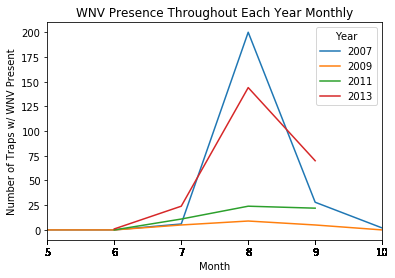

In [65]:
#The peaking between month's 7 and 9 is clearly seen, but much more prevalent in 2007 & 2013.
ax = train.groupby(by=['Year','Month'])['WnvPresent'].sum().unstack(level=0).plot(xticks=train['Month'], 
                                                                                        title='WNV Presence Throughout Each Year Monthly')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Traps w/ WNV Present');
plt.savefig('../data/monthly_wnv.png')

From the chart above, we notice a trend where WNV presence peak between August and September but it's much more obvious in 2007 and 2013. Since we only have spray data for 2011 and 2013, and there were only 2 sprays in 2011, we will put our focus on sprays in 2013. 

In [66]:
# To remove spray location which is outside Chicago
spray = spray[(spray['Longitude']>=-88) & (spray['Latitude']<=42.3)]
spray.head()

,index,Date,Latitude,Longitude,Year,Month,Day,Week
0,95,2011-07-09,41.981433,-87.787777,2011,7,9,27
1,96,2011-07-09,41.980998,-87.787778,2011,7,9,27
2,97,2011-07-09,41.980560,-87.787762,2011,7,9,27
3,98,2011-07-09,41.980198,-87.787758,2011,7,9,27
4,99,2011-07-09,41.979752,-87.787765,2011,7,9,27


The common years that occurs in the 3 datasets (train, spray and weather] are 2011 and 2013.
Taking the spray dataset specifically, we should take the year that has the bulk of the data (Year 2011 has 2 dates and Year 2013 has 8 dates) so if we use Year 2011 as the analyser, results will not be that conclusive. 
moreover, Year 2013 is preferred as well, I mean for starters, a new life came into this world, a young adult entered university, a new relationship started and a special frienship was forged.

In [67]:
train_2013 = train[train['Year']==2013]

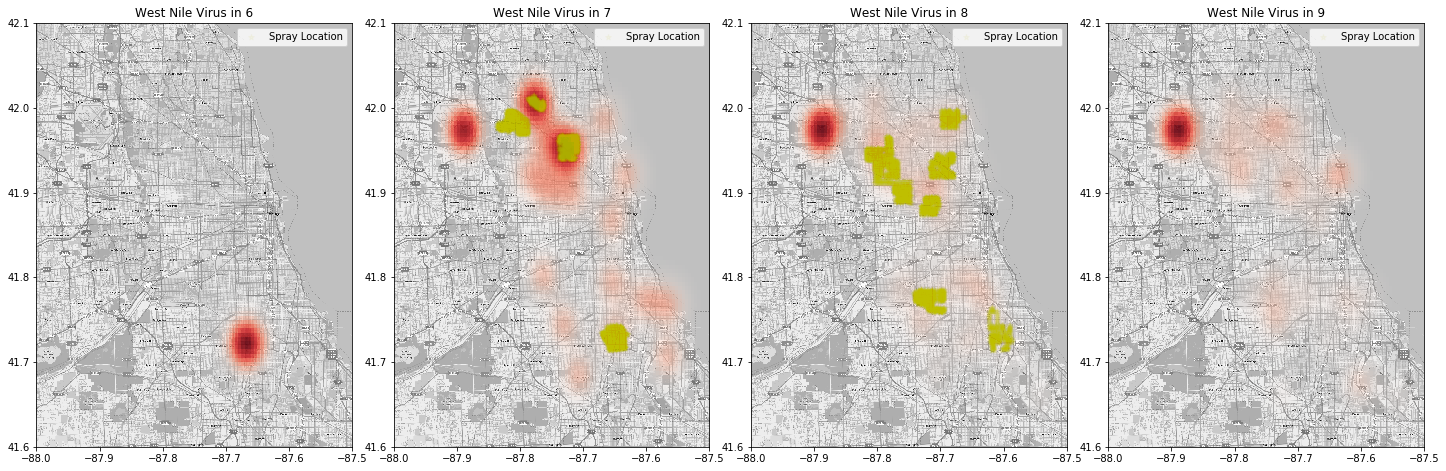

In [69]:
mapdata = np.loadtxt("../data/resources/mapdata_copyright_openstreetmap_contributors.txt")

# Map trap and west nile heatmap 
fig, ax = plt.subplots(figsize = (20,9),nrows = 1, ncols = 4, sharey = False)
fig.tight_layout()
for idx, month in enumerate(train_2013['Month'].unique()):
    # Show map in desired lat, long range 
    axis = ax[idx]
    axis.imshow(mapdata, cmap = plt.get_cmap('gray'), extent = (-88, -87.5, 41.6, 42.1),
               aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1])
    
    # Scatter plot for trap locations 
    traps = train_2013[['Longitude', 'Latitude']].drop_duplicates().values
    
    # Plot a density map of West Nile Virus sighting
    alphas = plt.cm.Reds
    alphas._init()
    alphas._lut[:-3, -1] = abs(np.logspace(0,1,alphas.N) / 10 - 1)[::-1]
    virus_locs = train_2013[['Longitude','Latitude']][(train_2013['WnvPresent'] == 1) & (train_2013['Month'] == month)]
    kern = KernelDensity(bandwidth = 0.02)
    kern.fit(virus_locs.values)
    xv, yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(), yv.ravel()]).T
    zv = np.exp(kern.score_samples(gridpoints).reshape(100,100))
    axis.imshow(zv,
               origin = 'lower',
              cmap = alphas,
              extent = (-88, -87.5, 41.6, 42.1),
              aspect = mapdata.shape[0]*1.0/mapdata.shape[1])
    # Scatter plot for spray locations (had removed outliers that is out of the city of chicago)
    spray_loc = spray[['Longitude', 'Latitude','Month']].drop_duplicates()
    current = spray_loc[spray_loc['Month']==month]
    axis.scatter(current['Longitude'], current['Latitude'], marker = '*', color = 'y', label = "Spray Location", alpha=0.05)
    # Labels
    axis.set_title(f"West Nile Virus in {month}")
    axis.legend();
    #plt.savefig('../assets/effectiveness_of_spray.png')
    

By plotting the heatmap on prevalence of WNV in 2013 by month, we can see that prevalence of the WNV indeed peaks between July and September. This suggests that if we start spraying in early-July (before the expected spike in mid July), we may be able to reduce the prevalence of WNV in subsequent months.

Next, we will look at where we can target the spraying to increase the effectiveness of sprays.

## WHERE SHOULD WE SPRAY?

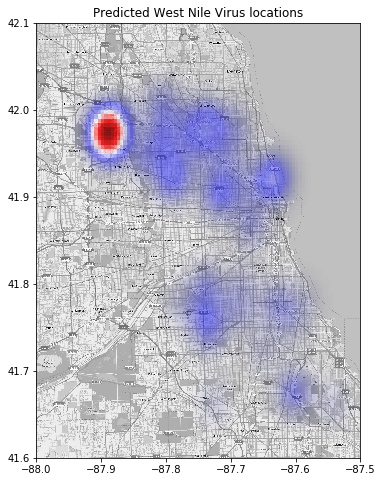

In [72]:
# plot possible outbreak areas geograhically 
# Initialize map 
pred = pd.read_csv('../data/sub_cba.csv')
plt.figure(figsize = (12,8))
ax = plt.gca()
ax.imshow(mapdata, cmap = plt.get_cmap('gray'), extent = (-88, -87.5, 41.6, 42.1),
           aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1])
# Plot a density map of our West Nile Virus predictions
alphas = plt.cm.seismic
alphas._init()
alphas._lut[:-3, -1] = abs(np.logspace(0,1,alphas.N) / 10 - 1)[::-1]
virus_loc = pred[['Longitude','Latitude']]
kern = KernelDensity(bandwidth = 0.02)
kern.fit(virus_locs.values)
xv, yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(), yv.ravel()]).T
zv = np.exp(kern.score_samples(gridpoints).reshape(100,100))
ax.imshow(zv,
          origin = 'lower',
          cmap = alphas,
          extent = (-88, -87.5, 41.6, 42.1),
          aspect = mapdata.shape[0]*1.0/mapdata.shape[1])
plt.title("Predicted West Nile Virus locations")
#plt.savefig('../assets/dangerzones.png')
plt.show()

This heatmap shows the predicted area where there will be WNV based on our model. We can hence target the sprays to these area to increase the effectiveness of the spray, and thereby reducing the prevalence of WNV.

## Further work

Since there is a missing component in the data, we should include the bird migratory data for affected birds that carry the West Nile Virus. 

Even though the number of mosquitos are not directly related to the existence of the virus, we should still aim to reduce the number of mosquitos as they are afterall a carrier of the virus. So we could model to predict the number of mosquitos so that we can further aim at cluster areas to reduce the population of mosquitos. 

## Conclusion and Recommendations

| Type     | Cost                         |
|----------|------------------------------|
| Medical  | \\$168 million to \\$250 million |
| Spraying | \\$701,790                     |


Assuming there will be an outbreak, the medical fees are estimated to be \\$168 million to \\$250 million and conversely if the state will have to spray, assuming they spray 477 square kilometres, it will be only just \\$701,790.

This seems to be an obvious choice to choose one of the vector control methods, spraying of insecticide to save future costs impacted by the existence of the West Nile Virus. 

However, combating the West Nile Virus and curb mosquito populations ought to be recognized as everyone's responsibility so that we can eradicate the West Nile Virus and other vector bourne diseases together. We can educate the public to remove stagnant water and other favourable conditions of mosquito breeding starting from their own homes and workplaces. This should be the best way forward to prevent the laying eggs of mosquitos. 

When a substantial density of WNV was detected in mosquito pools for 2 consecutive weeks, CDPH sprayed implicated geographic areas to control adult mosquitos

Since the savings from spraying is greater then the cost of spraying, we would recommend to always spray in order to control the spread of WNV. We could also consider spraying slightly earlier, near early July before the expected peak of WNV to further reduce the spread of west nile virus.

Furthermore, we could consider larviciding in late June to control the presence of mosquitose when they are still in a larva or pupa form. This could further prevent the spread of WNV in subsequent months.

One limitation to our model is that there are overlapping clusters so if a point falls in between or part of clusters that overlaps, that point will be assigned the closest cluster between the two and it is not very definitive if that particular point has been sprayed. 

Increasing the range of parameters in the gridsearch with the objective to tune the model with a higher ROC-AUC score should also be explored.